In [84]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import numpy as np

In [85]:
df= pd.read_csv('diabetes.csv')

In [86]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [87]:
def df_to_dataset(dataframe, shuffle=True, batch_size=32):
  df = dataframe.copy()
  labels = df.pop('Outcome')
  df = {key: value[:,tf.newaxis] for key, value in dataframe.items()}
  ds = tf.data.Dataset.from_tensor_slices((dict(df), labels))
  if shuffle:
    ds = ds.shuffle(buffer_size=len(dataframe))
  ds = ds.batch(batch_size)
  ds = ds.prefetch(batch_size)
  return ds

In [100]:
train, val, test = np.split(df.sample(frac=1), [int(0.8*len(df)), int(0.9*len(df))])


In [101]:
val = pd.concat([test, val])

In [102]:
val.shape[0]/df.shape[0]

0.20052083333333334

In [103]:
# batch_size = 5
# train_ds = df_to_dataset(train, batch_size=batch_size)
# val_ds = df_to_dataset(val, shuffle=False, batch_size=batch_size)
# test_ds = df_to_dataset(test, shuffle=False, batch_size=batch_size)

In [104]:
# model = keras.Sequential([keras.layers.Dense(8,activation="relu"), keras.layers.Dense(1,activation="sigmoid")])

In [105]:
# model = keras.Sequential()
# model.add(keras.layers.Dense(512, activation='relu', input_shape=(8,)))
# model.add(keras.layers.Dense(256, activation='relu'))
# model.add(keras.layers.Dropout(0.25))
# model.add(keras.layers.Dense(128, activation='relu'))
# model.add(keras.layers.Dropout(0.25))
# model.add(keras.layers.Dense(56, activation='relu'))
# model.add(keras.layers.Dropout(0.25))
# model.add(keras.layers.Dense(8, activation='relu'))
# model.add(keras.layers.Dropout(0.25))
# model.add(keras.layers.Dense(1, activation='sigmoid'))

In [106]:
model=tf.keras.Sequential([
                           tf.keras.layers.Dense(128,activation='tanh',input_shape=(8,)),
                           tf.keras.layers.Dropout(0.1),
                           tf.keras.layers.Dense(108,activation='relu'),
                           tf.keras.layers.Dropout(0.3), 
                           tf.keras.layers.Dense(56,activation='tanh'),
                           tf.keras.layers.Dropout(0.125),
                           tf.keras.layers.Dense(24,activation='exponential'),
                           tf.keras.layers.Dropout(0.3),
                           tf.keras.layers.Dense(1,activation='sigmoid')
])

In [107]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_train = scaler.fit_transform(train.drop('Outcome', axis=1))
scaled_test = scaler.transform(val.drop('Outcome', axis=1))
print(scaled_train)

[[0.17647059 0.41919192 0.47540984 ... 0.57744108 0.11016225 0.06666667]
 [0.47058824 0.37373737 0.57377049 ... 0.59427609 0.2677199  0.3       ]
 [0.         0.84343434 0.         ... 0.54377104 0.32493595 0.15      ]
 ...
 [0.11764706 0.55050505 0.75409836 ... 0.71885522 0.32749787 0.55      ]
 [0.11764706 0.40909091 0.49180328 ... 0.46632997 0.09052092 0.06666667]
 [0.35294118 0.63131313 0.63934426 ... 0.46464646 0.20794193 0.46666667]]


In [108]:
lr_schedule = keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=1e-1,
    decay_steps=100,
    decay_rate=0.9)
optimizer = keras.optimizers.SGD(learning_rate=lr_schedule)
model.compile(optimizer=optimizer,
              loss=keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=["accuracy"])

In [109]:
model.fit(scaled_train,train['Outcome'], epochs=200,verbose=2,validation_data=[scaled_test,val['Outcome']],batch_size=64)

Epoch 1/200


C:\Users\Karan\miniconda3\envs\cpu\lib\site-packages\tensorflow\python\util\dispatch.py:1082: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


10/10 - 1s - loss: 0.7117 - accuracy: 0.6042 - val_loss: 0.6688 - val_accuracy: 0.6169 - 694ms/epoch - 69ms/step
Epoch 2/200
10/10 - 0s - loss: 0.7279 - accuracy: 0.6042 - val_loss: 0.6460 - val_accuracy: 0.6169 - 58ms/epoch - 6ms/step
Epoch 3/200
10/10 - 0s - loss: 0.6815 - accuracy: 0.6026 - val_loss: 0.6509 - val_accuracy: 0.6169 - 56ms/epoch - 6ms/step
Epoch 4/200
10/10 - 0s - loss: 0.6547 - accuracy: 0.6368 - val_loss: 0.6335 - val_accuracy: 0.6169 - 54ms/epoch - 5ms/step
Epoch 5/200
10/10 - 0s - loss: 0.6504 - accuracy: 0.6466 - val_loss: 0.6249 - val_accuracy: 0.6169 - 57ms/epoch - 6ms/step
Epoch 6/200
10/10 - 0s - loss: 0.6434 - accuracy: 0.6401 - val_loss: 0.6216 - val_accuracy: 0.6169 - 52ms/epoch - 5ms/step
Epoch 7/200
10/10 - 0s - loss: 0.6320 - accuracy: 0.6661 - val_loss: 0.6175 - val_accuracy: 0.6169 - 46ms/epoch - 5ms/step
Epoch 8/200
10/10 - 0s - loss: 0.6345 - accuracy: 0.6580 - val_loss: 0.6099 - val_accuracy: 0.6883 - 51ms/epoch - 5ms/step
Epoch 9/200
10/10 - 0s - l

In [110]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_35 (Dense)            (None, 128)               1152      
                                                                 
 dropout_28 (Dropout)        (None, 128)               0         
                                                                 
 dense_36 (Dense)            (None, 108)               13932     
                                                                 
 dropout_29 (Dropout)        (None, 108)               0         
                                                                 
 dense_37 (Dense)            (None, 56)                6104      
                                                                 
 dropout_30 (Dropout)        (None, 56)                0         
                                                                 
 dense_38 (Dense)            (None, 24)               

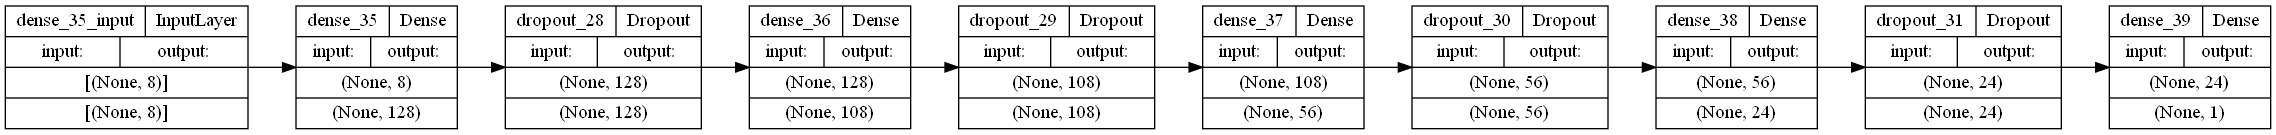

In [111]:
tf.keras.utils.plot_model(model, show_shapes=True, rankdir="LR")